# GRADIENT BOOSTING & XGBOOST

## GRADIENT BOOSTING

In [180]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib


from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [181]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [182]:
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [183]:
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (930, 15)

변수 :  Index(['CHURN', 'CUSTOMER_ID', 'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET',
       'USAGE_BAND', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME'],
      dtype='object')


In [184]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

결측치 처리를 위해 결측치 유무를 확인할 결과 결측치가 없었음

In [185]:
df_raw.drop('CUSTOMER_ID', axis=1, inplace=True)
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [186]:
df_raw["CHURN"] = df_raw["CHURN"].replace({"Active": 0, "Churned": 1})
df_raw['GENDER'] = df_raw['GENDER'].replace({'M': 0, 'F': 1})

CHURN과 GENDER가 각각 클래스가 2개 이므로 0, 1로 변환하여 진행

In [187]:
df_raw_dummy = pd.get_dummies(df_raw)

변환한 데이터에 대해 더미변수 생성

In [188]:
df_raw_x = df_raw_dummy.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["CHURN"] 

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (930, 32)
분할 후 설명변수 데이터 :Train (651, 32)   Test (279, 32)


train과 test 데이터셋을 7:3으로 데이터 비율 분할 (X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)

In [189]:

print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['GENDER', 'AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'CHARGE_TYPE_CAT 100',
       'CHARGE_TYPE_CAT 200', 'CHARGE_TYPE_CAT 50', 'CHARGE_TYPE_Play 100',
       'CHARGE_TYPE_Play 300', 'HANDSET_ASAD170', 'HANDSET_ASAD90',
       'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30', 'HANDSET_CAS60',
       'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10', 'HANDSET_SOP20',
       'HANDSET_WC95', 'USAGE_BAND_High', 'USAGE_BAND_Low', 'USAGE_BAND_Med',
       'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow', 'USAGE_BAND_None'],
      dtype='object')

변수 :  Index(['GENDER', 'AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'CHARGE_TYPE_CAT 100',
       'CHARGE_TYPE_CAT 200', 'CHARGE_TYPE_CAT 50', 'CHARGE_TYPE_Play 100',
       'CHARGE_TYPE_

In [190]:
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 0.971
Accuracy on test set: 0.885


그래디언트 부스팅 모델 생성 후 train, test 모델 정확도 확인

In [191]:
# 실행옵션 확인
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


In [192]:

train_accuracy = []; test_accuracy = []

para_lr = [lr * 0.05 for lr in range(1, 10)]
# para_lr = [lr * 0.02 for lr in range(1, 20)]   # 민감하게 변화하면 0.02 간격으로 확인

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))


df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

최적의 learning rate를 찾기 위해 변화시켜가며 적절한 learning rate값 탐색 <br>
0.05의 배수로 10번 진행하여 최적값 탐색 진행

In [193]:
# LearningRate별 정확도 
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.05,0.940,0.900
1,0.10,0.971,0.885
2,0.15,0.985,0.882
3,0.20,0.998,0.885
4,0.25,1.000,0.878
5,0.30,1.000,0.892
6,0.35,1.000,0.885
7,0.40,1.000,0.864
8,0.45,1.000,0.896


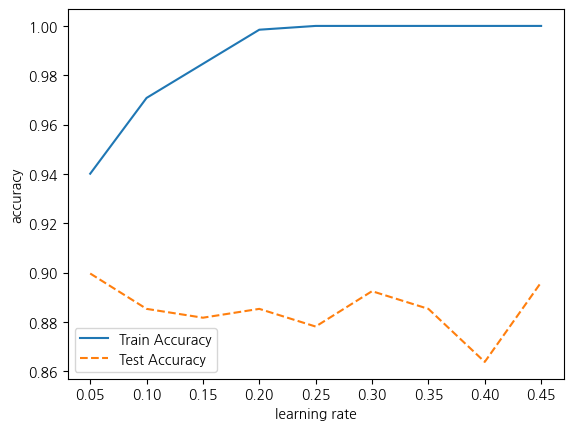

In [194]:

plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

탐색 결과 learning rate가 0.20부터는 overfitting이 발생할 것으로 생각되어 0.20 미만의 값으로 정하기로 결정함 <br>
그중 test accuracy가 적당하게 잘 나온 0.1을 learning rate 값으로 결정함

In [195]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

learning rate를 0.1로 하고 알맞은 트리 수를 탐색함 <br>
트리 수는 10에서 10 단위로 150까지 진행함

In [196]:
# n_estimators별 정확도 
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.879,0.892
1,20,0.916,0.900
2,30,0.931,0.914
3,40,0.935,0.910
4,50,0.943,0.900
5,60,0.951,0.896
6,70,0.952,0.892
7,80,0.957,0.889
8,90,0.963,0.889
9,100,0.971,0.885


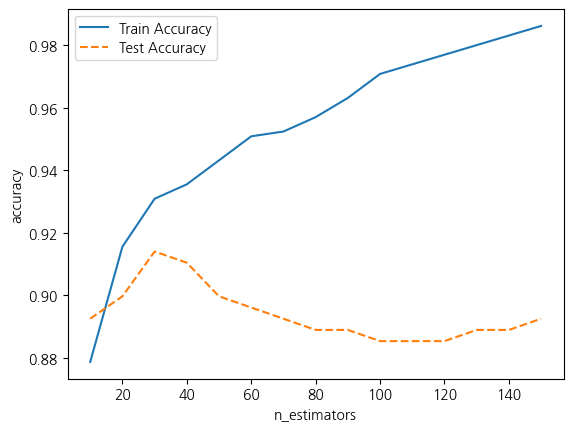

In [197]:
# 정확도를 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

트리 수가 늘어남에 다라 train accuracy가 계속 증가하지만 test accuracy는 증가하다가 감소하는 추세를 보임 <br>
test accuracy를 우선적으로 고려하여 트리 수는 30으로 선정함

In [198]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=30, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

적당한 최대 깊이를 고르기 위해 learning_rate와 n_estimator를 앞선 결과로 고정시켜두고 최대 깊이를 바꿔본 뒤 결과를 확인함

In [199]:
# max_depth별 정확도
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.871,0.896
1,2,0.909,0.900
2,3,0.931,0.914
3,4,0.942,0.896
4,5,0.955,0.896
5,6,0.966,0.892
6,7,0.983,0.889
7,8,0.997,0.878
8,9,1.000,0.878
9,10,1.000,0.878


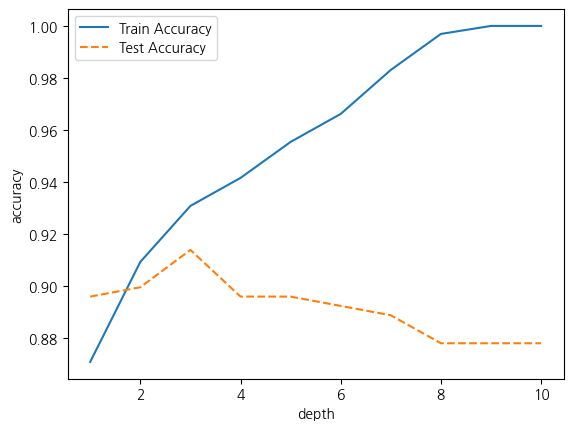

In [200]:
# 정확도를 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

최대 깊이의 수가 증가함에 따라 train accuracy가 증가하며 overfitting이 발생 <br>
test accuracy가 3을 기점으로 급속히 감소하는 걸 확인할 수 있음 <br>
이러한 사실로부터 test accuracy를 고려하여 최대 깊이 수를 3으로 선정

In [201]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=3, n_estimators=30, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))


df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

앞선 결과를 토대로 파라미터를 선정해두고 분할하기 위한 노드의 최소 샘플 수를 탐색해봄

In [202]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.928,0.910
1,20,0.920,0.900
2,30,0.912,0.921
3,40,0.912,0.918
4,50,0.906,0.914
5,60,0.911,0.921
6,70,0.909,0.921
7,80,0.909,0.921
8,90,0.909,0.914
9,100,0.902,0.918


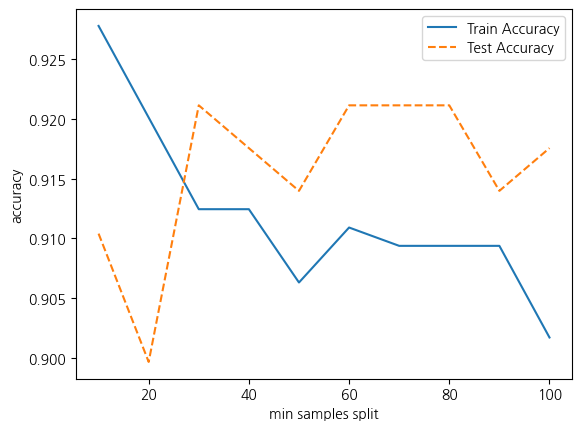

In [203]:
# 정확도를 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

분할하기 위한 샘플 수의 증가에 따라 train accuracy가 20에서 감소했다가 30에서 증가하므로 train accuracy도 함께 고려해서 min samples split을 30으로 고정함

In [241]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 30,
                                     max_depth=3, n_estimators=30, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

잎사귀 노드의 최소 자료 수 변경에 따라 모델의 성능을 확인함 <br>
이전에 탐색한 파라미터에 대해 값을 고정시켜줌

In [242]:

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.912,0.921
1,10,0.911,0.918
2,15,0.908,0.914
3,20,0.906,0.914
4,25,0.894,0.892
5,30,0.899,0.892
6,35,0.900,0.889
7,40,0.899,0.896
8,45,0.825,0.835
9,50,0.826,0.828


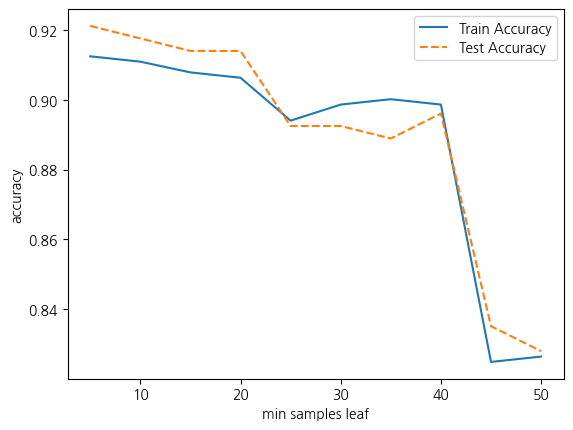

In [243]:
# 정확도를 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

잎사귀 노드의 최소 자료 수는 40에서 정확도가 급격히 감소하는 걸 확인 가능<br>
train, test accuracy는 40 전까지는 비교적 일정하게 유지되므로 40으로 고정

In [245]:

gb_final = GradientBoostingClassifier(min_samples_leaf = 40, min_samples_split = 30,
                                     max_depth=3, n_estimators=30, learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)


print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))

print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))

print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))


print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 0.899
Test Accuracy: 0.896

Test Confusion matrix: 
[[228   7]
 [ 22  22]]
              precision    recall  f1-score   support

      Active      0.912     0.970     0.940       235
     Churned      0.759     0.500     0.603        44

    accuracy                          0.896       279
   macro avg      0.835     0.735     0.771       279
weighted avg      0.888     0.896     0.887       279



accuracy가 0.9에는 미치지 못하지만 precision, recall이 적절하게 높은 성능이 나오게 되었음

In [208]:

v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_

df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3).head(10)

,Feature,Importance
16,HANDSET_ASAD90,0.225
3,DROPPED_CALLS,0.157
19,HANDSET_CAS30,0.108
5,PEAK_CALLS_TIME,0.106
2,SERVICE_DURATION,0.089
9,TOTAL_CALLS_TIME,0.087
1,AGE,0.037
6,WEEKEND_CALLS_NO,0.035
7,WEEKEND_CALLS_TIME,0.032
8,TOTAL_CALLS_NO,0.025


Text(0, 0.5, '설명변수')

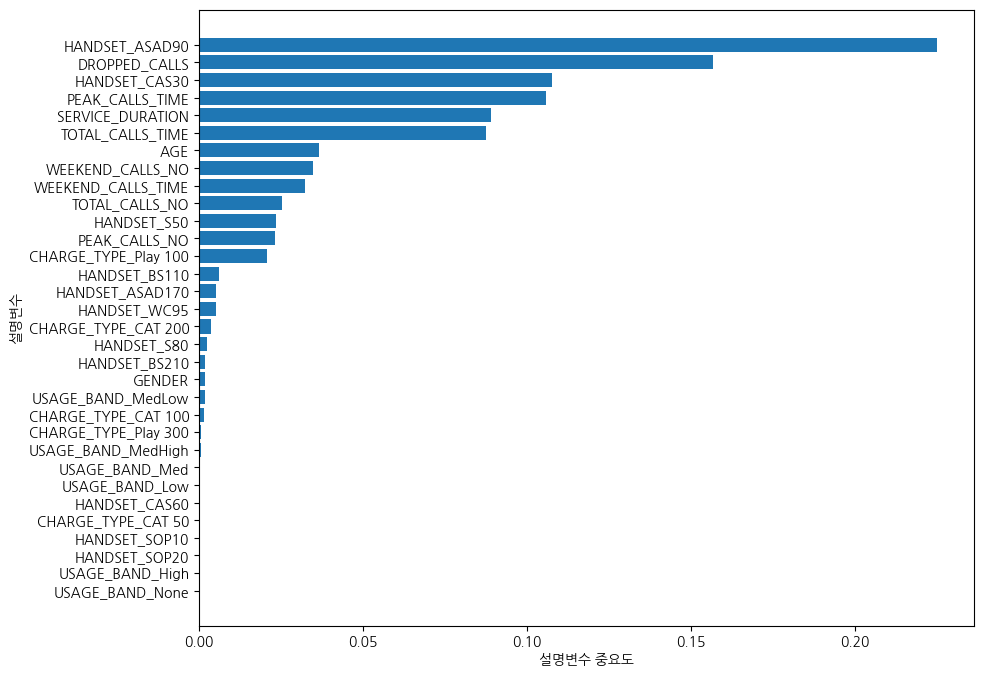

In [209]:

fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

HANDSET_ASAD90, DROPPED_CALLS, HANDSET_CAS30 등이 차례로 중요한 설명변수로 작용했음 <br>
계산된 변수 중요도가 낮거나 0이어도 훈련 데이터에 따라 중요도가 바뀔 수 있음 

## XGBOST

In [210]:
from xgboost import plot_importance

from xgboost import XGBClassifier

def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [211]:
xgboost_uncust = XGBClassifier(random_state=1234)

xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...)

In [212]:

xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')

xgb_pred_train = xgboost_uncust.predict(df_train_x)

eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')

xgb_pred_test = xgboost_uncust.predict(df_test_x)

eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[515   0]
 [  0 136]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[221  14]
 [ 18  26]] 

정확도: 0.8853
정밀도: 0.6500
재현율: 0.5909
F1    : 0.6190
AUC   : 0.7657


In [213]:

xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)

xgboost_user.fit(df_train_x, df_train_y)


xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))



xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[515   0]
 [  3 133]] 

정확도: 0.9954
정밀도: 1.0000
재현율: 0.9779
F1    : 0.9888
AUC   : 0.9890

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       515
           1       1.00      0.98      0.99       136

    accuracy                           1.00       651
   macro avg       1.00      0.99      0.99       651
weighted avg       1.00      1.00      1.00       651


 사용자 모델 평가 : Test 

오차행렬:
 [[223  12]
 [ 18  26]] 

정확도: 0.8925
정밀도: 0.6842
재현율: 0.5909
F1    : 0.6341
AUC   : 0.7699

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       235
           1       0.68      0.59      0.63        44

    accuracy                           0.89       279
   macro avg       0.80      0.77      0.79       279
weighted avg       0.89      0.89      0.89       279



In [214]:

eval_df = [(df_test_x, df_test_y)]

xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, 

             early_stopping_rounds = 150, eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.42452
[1]	validation_0-logloss:0.40164
[2]	validation_0-logloss:0.38374
[3]	validation_0-logloss:0.36798
[4]	validation_0-logloss:0.35527
[5]	validation_0-logloss:0.34397
[6]	validation_0-logloss:0.33558
[7]	validation_0-logloss:0.32758
[8]	validation_0-logloss:0.31747
[9]	validation_0-logloss:0.31251
[10]	validation_0-logloss:0.30744
[11]	validation_0-logloss:0.29996
[12]	validation_0-logloss:0.29571
[13]	validation_0-logloss:0.29265
[14]	validation_0-logloss:0.28665
[15]	validation_0-logloss:0.28448
[16]	validation_0-logloss:0.27959
[17]	validation_0-logloss:0.27665
[18]	validation_0-logloss:0.27400
[19]	validation_0-logloss:0.27339
[20]	validation_0-logloss:0.27009
[21]	validation_0-logloss:0.26945
[22]	validation_0-logloss:0.26790
[23]	validation_0-logloss:0.26594
[24]	validation_0-logloss:0.26362
[25]	validation_0-logloss:0.26133
[26]	validation_0-logloss:0.25963
[27]	validation_0-logloss:0.25799
[28]	validation_0-logloss:0.25715
[29]	validation_0-loglos

/home/piai/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.25359
[41]	validation_0-logloss:0.25347
[42]	validation_0-logloss:0.25313
[43]	validation_0-logloss:0.25373
[44]	validation_0-logloss:0.25398
[45]	validation_0-logloss:0.25382
[46]	validation_0-logloss:0.25527
[47]	validation_0-logloss:0.25591
[48]	validation_0-logloss:0.25701
[49]	validation_0-logloss:0.25746
[50]	validation_0-logloss:0.25718
[51]	validation_0-logloss:0.25635
[52]	validation_0-logloss:0.25750
[53]	validation_0-logloss:0.25721
[54]	validation_0-logloss:0.25783
[55]	validation_0-logloss:0.25894
[56]	validation_0-logloss:0.25844
[57]	validation_0-logloss:0.25944
[58]	validation_0-logloss:0.25836
[59]	validation_0-logloss:0.25669
[60]	validation_0-logloss:0.25655
[61]	validation_0-logloss:0.25719
[62]	validation_0-logloss:0.25795
[63]	validation_0-logloss:0.25846
[64]	validation_0-logloss:0.25934
[65]	validation_0-logloss:0.25994
[66]	validation_0-logloss:0.26009
[67]	validation_0-logloss:0.25968
[68]	validation_0-logloss:0.25982
[69]	validatio

[131]	validation_0-logloss:0.28884
[132]	validation_0-logloss:0.28848
[133]	validation_0-logloss:0.28866
[134]	validation_0-logloss:0.28888
[135]	validation_0-logloss:0.28931
[136]	validation_0-logloss:0.28949
[137]	validation_0-logloss:0.28928
[138]	validation_0-logloss:0.28952
[139]	validation_0-logloss:0.29037
[140]	validation_0-logloss:0.29052
[141]	validation_0-logloss:0.29078
[142]	validation_0-logloss:0.29138
[143]	validation_0-logloss:0.29216
[144]	validation_0-logloss:0.29245
[145]	validation_0-logloss:0.29306
[146]	validation_0-logloss:0.29376
[147]	validation_0-logloss:0.29383
[148]	validation_0-logloss:0.29455
[149]	validation_0-logloss:0.29523
[150]	validation_0-logloss:0.29520
[151]	validation_0-logloss:0.29558
[152]	validation_0-logloss:0.29629
[153]	validation_0-logloss:0.29709
[154]	validation_0-logloss:0.29779
[155]	validation_0-logloss:0.29876
[156]	validation_0-logloss:0.29919
[157]	validation_0-logloss:0.29928
[158]	validation_0-logloss:0.30014
[159]	validation_0-l

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...)

In [215]:

print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)  

최적 횟수: 36
최적 성능(0-LogLoss): 0.25060945713565447


In [216]:

xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[224  11]
 [ 18  26]] 

정확도: 0.8961
정밀도: 0.7027
재현율: 0.5909
F1    : 0.6420
AUC   : 0.7721

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       235
           1       0.70      0.59      0.64        44

    accuracy                           0.90       279
   macro avg       0.81      0.77      0.79       279
weighted avg       0.89      0.90      0.89       279



{'GENDER': 32.0, 'AGE': 261.0, 'SERVICE_DURATION': 270.0, 'DROPPED_CALLS': 138.0, 'PEAK_CALLS_NO': 197.0, 'PEAK_CALLS_TIME': 237.0, 'WEEKEND_CALLS_NO': 183.0, 'WEEKEND_CALLS_TIME': 233.0, 'TOTAL_CALLS_NO': 160.0, 'TOTAL_CALLS_TIME': 194.0, 'CHARGE_TYPE_CAT 100': 6.0, 'CHARGE_TYPE_CAT 200': 12.0, 'CHARGE_TYPE_CAT 50': 2.0, 'CHARGE_TYPE_Play 100': 26.0, 'CHARGE_TYPE_Play 300': 16.0, 'HANDSET_ASAD170': 23.0, 'HANDSET_ASAD90': 99.0, 'HANDSET_BS110': 49.0, 'HANDSET_BS210': 14.0, 'HANDSET_CAS30': 73.0, 'HANDSET_S50': 49.0, 'HANDSET_S80': 17.0, 'HANDSET_WC95': 23.0, 'USAGE_BAND_Med': 8.0, 'USAGE_BAND_MedHigh': 27.0, 'USAGE_BAND_MedLow': 4.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

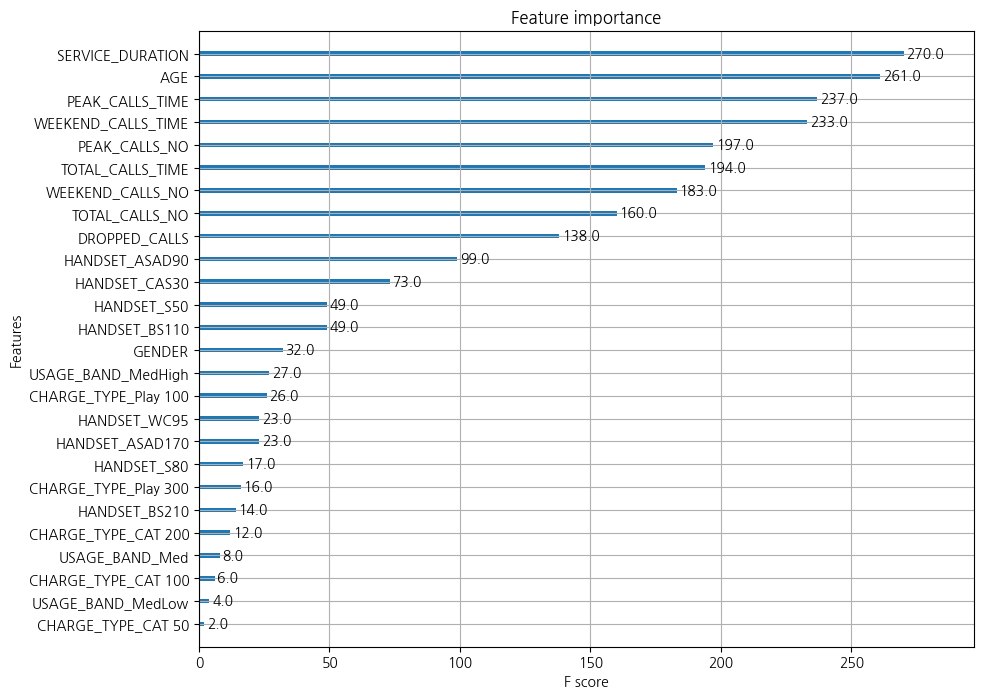

In [217]:

from xgboost import plot_importance
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_stop, ax=ax)

# Support Vector Machine

In [218]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [219]:
# 데이터 불러오기
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/통신고객이탈.csv")
df_raw.drop('CUSTOMER_ID', axis=1, inplace=True)

In [220]:
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'목표변수:'

0    Active
1    Active
2    Active
3    Active
4    Active
Name: CHURN, dtype: object

In [221]:
df_raw["CHURN"] = df_raw["CHURN"].replace({"Active": 0, "Churned": 1})
df_raw['GENDER'] = df_raw['GENDER'].replace({'M': 0, 'F': 1})

In [222]:

df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()
 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,F,CAT 100,ASAD170,Med
1,M,CAT 100,S50,Med
2,M,CAT 100,ASAD170,Med
3,M,CAT 100,ASAD170,Med
4,F,CAT 100,S50,Med


'Dummy 변환 후:'

,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [223]:
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")

v_feature_names = df_raw_x_num.columns


scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,27,49.40,11,260,582.0,0,0.0,265,614.1
3,61,48.60,1,294,661.8,14,101.5,326,844.0
4,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610


In [224]:

df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,0,...,0,0,0,0,0,0,1,0,0,0
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,0,...,0,0,0,0,0,0,1,0,0,0
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,1,...,0,0,0,0,0,0,1,0,0,0


In [225]:

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (651, 33)
분할된 Test Data: (279, 33)


In [226]:
svm_uncust = SVC(random_state=1234)
svm_uncust.fit(df_train_x, df_train_y)


print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))

print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

Train Accuracy : 0.906
Test Accuracy : 0.885


In [227]:

print(svm_uncust.get_params().keys())
print(svm_uncust.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


In [228]:

train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_c = [0.1 * c for c in range(1, 13)] )] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))


df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [229]:
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.01,0.791,0.842
1,0.10,0.791,0.842
2,1.00,0.906,0.885
3,10.00,0.985,0.885
4,100.00,1.000,0.885


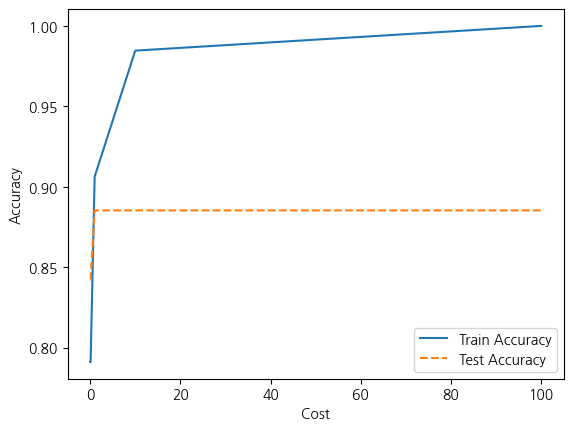

In [230]:
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [231]:

train_accuracy = []; test_accuracy = []

# para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 13)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))


df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [232]:

df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.1,0.791,0.842
1,0.2,0.791,0.842
2,0.3,0.791,0.842
3,0.4,0.791,0.842
4,0.5,0.797,0.839
5,0.6,0.837,0.835
6,0.7,0.856,0.860
7,0.8,0.876,0.864
8,0.9,0.902,0.875
9,1.0,0.906,0.885


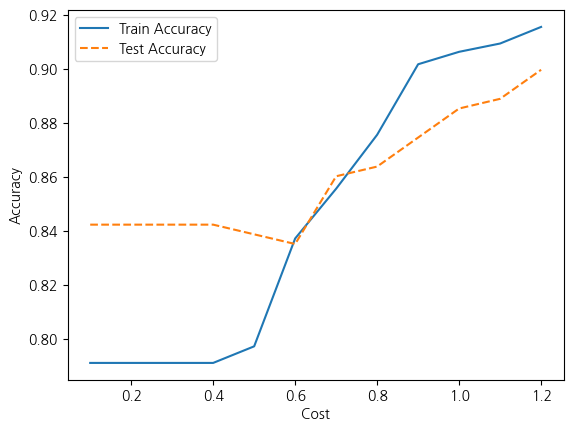

In [233]:
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [234]:

train_accuracy = []; test_accuracy = []

para_gamma = [10 **gamma for gamma in range(-2, 3)]
# para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))


df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [235]:

df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.7911,0.8423
1,0.10,0.8971,0.8674
2,1.00,0.9831,0.8423
3,10.00,1.0000,0.8423
4,100.00,1.0000,0.8423


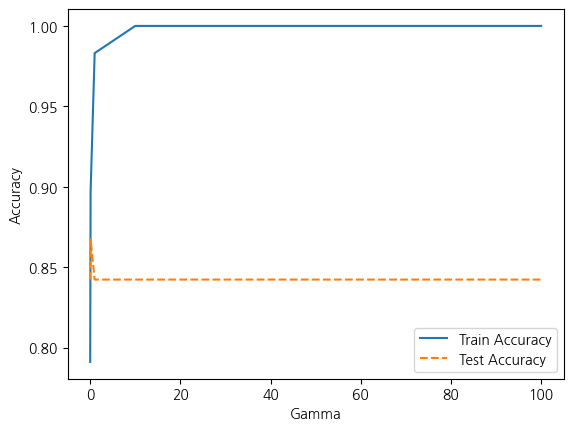

In [236]:
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma") 
plt.legend()

In [237]:

train_accuracy = []; test_accuracy = []

para_gamma = [0.1 * gamma for gamma in range(1, 11)]    

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))


df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [238]:
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.8971,0.8674
1,0.2,0.9232,0.8602
2,0.3,0.9324,0.8530
3,0.4,0.9493,0.8530
4,0.5,0.9539,0.8459
5,0.6,0.9647,0.8423
6,0.7,0.9739,0.8423
7,0.8,0.9754,0.8423
8,0.9,0.9800,0.8423
9,1.0,0.9831,0.8423


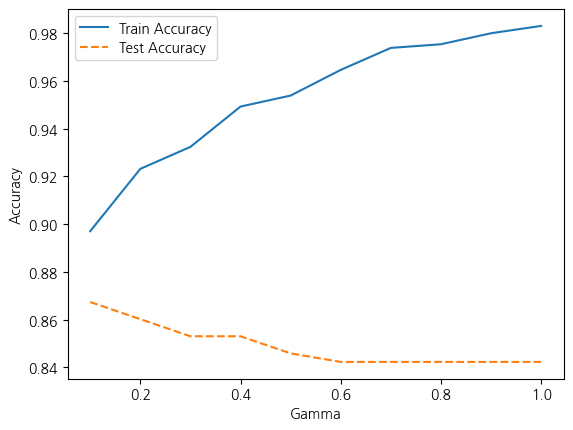

In [239]:
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")
plt.legend()

In [240]:
svc_final = SVC(gamma=0.2, C=0.8, random_state=1234)
svc_final.fit(df_train_x, df_train_y)

y_pred = svc_final.predict(df_test_x)

print("Train Accucary : {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
print("Test Accuracy : {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.923
Test Accuracy : 0.860

Test Confusion matrix: 
[[234   1]
 [ 38   6]]
              precision    recall  f1-score   support

      Active      0.860     0.996     0.923       235
     Churned      0.857     0.136     0.235        44

    accuracy                          0.860       279
   macro avg      0.859     0.566     0.579       279
weighted avg      0.860     0.860     0.815       279



# 인공 신경망

In [324]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [325]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [326]:
# 데이터 불러오기
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/통신고객이탈.csv")
df_raw.drop('CUSTOMER_ID', axis=1, inplace=True)
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [327]:
df_raw["CHURN"] = df_raw["CHURN"].replace({"Active": 0, "Churned": 1})
df_raw['GENDER'] = df_raw['GENDER'].replace({'M': 0, 'F': 1})

In [328]:
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,1,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'목표변수:'

0    0
1    0
2    0
3    0
4    0
Name: CHURN, dtype: int64

In [329]:
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")

v_feature_names = df_raw_x_num.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1,31,33.33,6,218,379.8,9,21.6,366,632.4
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0
4,1,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880
1,-1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260
2,-1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357
3,-1.059853,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795
4,0.943527,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610


In [330]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,CHARGE_TYPE,HANDSET,USAGE_BAND
0,CAT 100,ASAD170,Med
1,CAT 100,S50,Med
2,CAT 100,ASAD170,Med
3,CAT 100,ASAD170,Med
4,CAT 100,S50,Med


'Dummy 변환 후:'

,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,HANDSET_BS210,HANDSET_CAS30,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [331]:
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,1,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,...,0,0,0,0,0,0,1,0,0,0
1,-1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,...,0,0,0,0,0,0,1,0,0,0
2,-1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,...,0,0,0,0,0,0,1,0,0,0
3,-1.059853,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,...,0,0,0,0,0,0,1,0,0,0
4,0.943527,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,...,0,0,0,0,0,0,1,0,0,0


In [332]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (651, 32)
분할된 Test Data: (279, 32)


In [333]:
nn_uncust = MLPClassifier(random_state=1234)
nn_uncust.fit(df_train_x, df_train_y)

print("Train Accuracy: {:.3f}".format(nn_uncust.score(df_train_x, df_train_y)))
print("Test Accuracy: {:.3f}".format(nn_uncust.score(df_test_x, df_test_y)))

Train Accuracy: 0.965
Test Accuracy: 0.907


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


은닉층 2개, 각 은닉층 노드 개수는 100개로 설정됨

In [334]:
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


In [335]:
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) # 은닉층 : 1D (5,), (10,)...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) # 은닉층 : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-pac

은닉층이 2D이므로 n x n 크기로 hidden layer size가 정해지게 됨

In [336]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.905,0.907
1,10,0.926,0.892
2,15,0.946,0.910
3,20,0.955,0.889
4,25,0.980,0.914
5,30,0.982,0.889
6,35,0.998,0.907
7,40,1.000,0.871
8,45,1.000,0.885
9,50,1.000,0.875


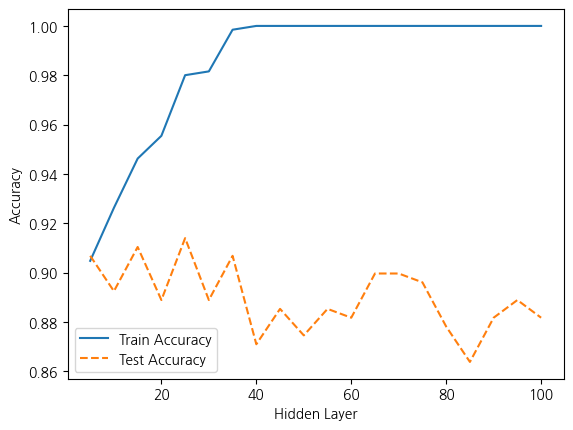

In [337]:
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

Hidden Layer의 수에 따른 모델의 성능을 측정했음 <br>
Train Accuracy는 40부터 1로 고정이 되어 과적합되는 현상이 나타났고 Test Accuracy는 0.88 정도로 유지되었음 <br>
과적합과 Test Accuracy 고려하여 40으로 설정함


In [344]:
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes=(35,35), random_state = 1234)
#     nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60), random_state = 1234) # 변경 가능
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [345]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.911,0.918
1,tanh,0.959,0.900
2,relu,0.998,0.907


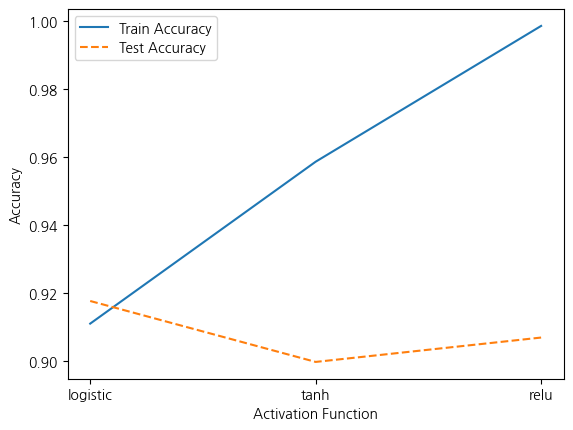

In [346]:
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Activation Function")
plt.legend()

3가지 활성화 함수에 따라 성능을 비교 분석했음 <br>
relu를 사용했을 때 train accuracy와 test accuracy가 종합적으로 높았으므로 이를 활성화 함수로 선택함

In [347]:
train_accuracy = []; test_accuracy = []
# solver 변경 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="relu", hidden_layer_sizes=(35,35), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [348]:
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.907
1,sgd,0.791,0.842
2,adam,0.998,0.907


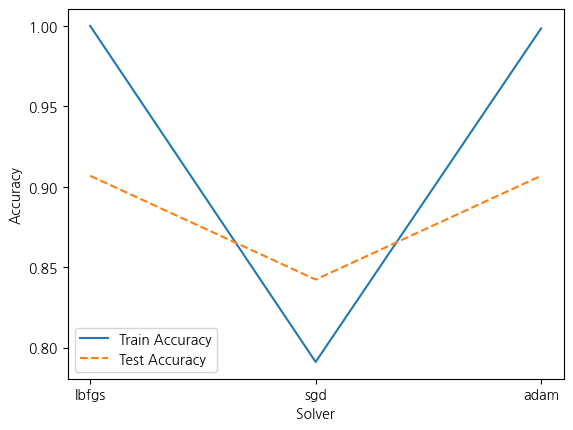

In [349]:
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Solver")
plt.legend()

Optimization으로 가장 많이 쓰인다고 알려진 adam과 lbfgs가 비슷하게 좋은 성과를 보였음 <br>
반면에 SGD의 경우 train/test accuracy 모두 낮은 성과가 나타났음 <br>
가장 성능이 잘 나오고 많이 쓰이는 adam을 선택함

In [355]:
train_accuracy = []; test_accuracy = []
# Mini Batch 변경
para_batch = [20 * batch for batch in range(1, 10)] 

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu", 
                       hidden_layer_sizes = (35,35), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

[20, 40, 60, 80, 100, 120, 140, 160, 180]


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-pac

In [356]:
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.000,0.878
1,40,1.000,0.892
2,60,1.000,0.889
3,80,1.000,0.900
4,100,1.000,0.892
5,120,1.000,0.896
6,140,1.000,0.896
7,160,0.975,0.900
8,180,1.000,0.896


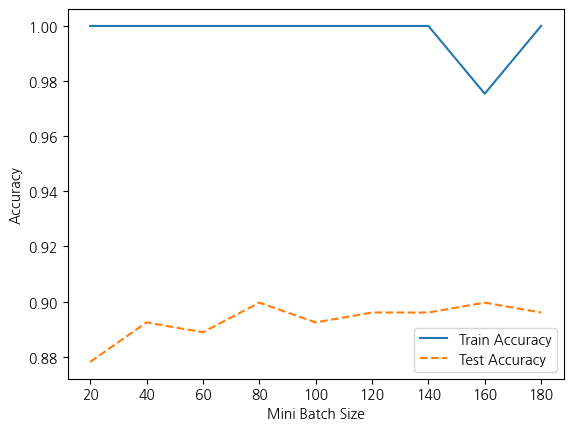

In [357]:
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

Batch Size가 커질수록 성능도 함께 향상되는 걸 확인할 수 있음 <br>
Batch Size는 180으로 고정하여 실험을 진행함

In [358]:
nn_final = MLPClassifier(hidden_layer_sizes=(35, 35), activation="relu", batch_size=180, solver="adam",random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 1.000
Test Accuracy : 0.896

Test Confusion Matrix: 
[[219  16]
 [ 13  31]]
              precision    recall  f1-score   support

           0      0.944     0.932     0.938       235
           1      0.660     0.705     0.681        44

    accuracy                          0.896       279
   macro avg      0.802     0.818     0.810       279
weighted avg      0.899     0.896     0.897       279



/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


최종 모델에 대한 성능은 다음과 같이 나옴 <br>
앞선 회귀 모델의 경우보다 precision recall f1-score 모두 높게 나왔음 <br>
이전의 대부분의 모델들처럼 0.9의 정확도를 넘기지 못했지만 종합적으로 높은 결과가가가 MLP를 이용한 분석에서 나타났음<br>
max_iter를 200으로 고정시켜둬서 모든 실험에 대해 train accuracy가 1로 과적합 현상이 나타났음 <br>
task가 어렵지 않은 만큼 그대로 실험을 진행해도 큰 무리는 없을 것으로 판단됨

## 모델 평가

In [27]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier


from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report


from collections import Counter

In [28]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [29]:
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/통신고객이탈.csv")
df_raw.drop('CUSTOMER_ID', axis=1, inplace=True)
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [30]:
df_raw["CHURN"] = df_raw["CHURN"].replace({"Active": 0, "Churned": 1})
df_raw['GENDER'] = df_raw['GENDER'].replace({'M': 0, 'F': 1})

In [31]:
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

In [32]:
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")

v_feature_names = df_raw_x_num.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

In [33]:
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,HANDSET_BS210,HANDSET_CAS30,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,1,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,...,0,0,0,0,0,0,1,0,0,0
1,-1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,...,0,0,0,0,0,0,1,0,0,0
2,-1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,...,0,0,0,0,0,0,1,0,0,0
3,-1.059853,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,...,0,0,0,0,0,0,1,0,0,0
4,0.943527,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,...,0,0,0,0,0,0,1,0,0,0


각 변수들에 대해 범주형 설명변수는 더미변환으로, 연속형 설명변수는 scaling 변환해줌

In [35]:
display("원래 설명변수:", df_raw_x.head(3))

df_x_raw_dummy = df_raw_x_num.join(df_x_dummy)
display("원래 연속형+ Dummied 범주형...DT/RF/GB 용:",df_x_raw_dummy.head(3))

df_x_scale_dummy = df_x_scaled.join(df_x_dummy)
display("Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:",df_x_scale_dummy.head(3))

df_x_scale_raw = df_x_scaled.join(df_raw_x_char)
display("Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):",df_x_scale_raw.head(3))

'원래 설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1


'원래 연속형+ Dummied 범주형...DT/RF/GB 용:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0


'Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,...,0,0,0,0,0,0,1,0,0,0
1,-1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,...,0,0,0,0,0,0,1,0,0,0
2,-1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,...,0,0,0,0,0,0,1,0,0,0


'Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CHARGE_TYPE,HANDSET,USAGE_BAND
0,0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,CAT 100,ASAD170,Med
1,-1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,CAT 100,S50,Med
2,-1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,CAT 100,ASAD170,Med


데이터를 전처리하여 설명 변수에 대해 데이터를 결합시킨다

In [55]:
df_train_x_rd, df_test_x_rd, df_train_y, df_test_y = train_test_split(df_x_raw_dummy, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

display("원래 연속형+ Dummied 범주형...DT/RF/GB 용:", df_train_x_rd.head())

df_train_x_sd, df_test_x_sd, df_train_y, df_test_y = train_test_split(df_x_scale_dummy, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

display("Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:", df_train_x_sd.head())

df_train_x_reg, df_test_x_reg, df_train_y, df_test_y = train_test_split(df_x_scale_raw, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

display("Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):",df_train_x_reg.head())

'원래 연속형+ Dummied 범주형...DT/RF/GB 용:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
64,1,40,36.00,2,556,1436.4,8,74.0,736,1862.9,...,0,0,0,0,0,0,0,1,0,0
201,1,41,45.33,11,73,403.2,15,39.0,204,962.4,...,0,0,0,0,0,0,1,0,0,0
37,1,26,55.07,0,546,1228.2,0,0.0,588,1294.8,...,0,0,0,0,0,0,0,1,0,0
403,1,24,50.83,2,249,445.2,6,15.0,274,527.1,...,0,0,0,1,0,0,1,0,0,0
322,0,32,55.63,10,125,232.2,4,112.8,159,525.9,...,0,0,0,0,0,0,1,0,0,0


'Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
64,0.943527,0.656147,0.118345,-0.193508,1.460175,1.432749,-0.494667,0.681142,1.560230,1.467105,...,0,0,0,0,0,0,0,1,0,0
201,0.943527,0.732453,0.776348,2.377387,-0.673327,-0.571954,-0.057841,-0.278129,-0.569516,-0.180203,...,0,0,0,0,0,0,1,0,0,0
37,0.943527,-0.412133,1.463266,-0.764818,1.416003,1.028781,-0.993897,-1.347031,0.967744,0.427865,...,0,0,0,0,0,0,0,1,0,0
403,0.943527,-0.564745,1.164238,-0.193508,0.104098,-0.490462,-0.619475,-0.935915,-0.289287,-0.976508,...,0,0,0,1,0,0,1,0,0,0
322,-1.059853,0.045701,1.502760,2.091732,-0.443633,-0.903743,-0.744282,1.744562,-0.749664,-0.978704,...,0,0,0,0,0,0,1,0,0,0


'Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CHARGE_TYPE,HANDSET,USAGE_BAND
64,0.943527,0.656147,0.118345,-0.193508,1.460175,1.432749,-0.494667,0.681142,1.560230,1.467105,CAT 200,S50,MedHigh
201,0.943527,0.732453,0.776348,2.377387,-0.673327,-0.571954,-0.057841,-0.278129,-0.569516,-0.180203,Play 300,ASAD170,Med
37,0.943527,-0.412133,1.463266,-0.764818,1.416003,1.028781,-0.993897,-1.347031,0.967744,0.427865,CAT 200,S50,MedHigh
403,0.943527,-0.564745,1.164238,-0.193508,0.104098,-0.490462,-0.619475,-0.935915,-0.289287,-0.976508,CAT 100,WC95,Med
322,-1.059853,0.045701,1.502760,2.091732,-0.443633,-0.903743,-0.744282,1.744562,-0.749664,-0.978704,Play 100,BS210,Med


In [56]:
model = ["DecisionTree", "RandomForest", "GradientBoosting", "NeuralNet"]

train_accuracy = []; test_accuracy = []

model_auc = []

model_precision = []; model_recall = []

model_f1_score = []

In [57]:
dt_final = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=14, random_state=1234)
dt_final.fit(df_train_x_rd, df_train_y)


train_accuracy.append(dt_final.score(df_train_x_rd, df_train_y))
test_accuracy.append(dt_final.score(df_test_x_rd, df_test_y))


y_prob_1 = dt_final.predict_proba(df_test_x_rd)[:, 1]
y_pred = dt_final.predict(df_test_x_rd) 

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

fpr_decision, tpr_decision, thresholds_decision = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr_decision, tpr_decision)

model_auc.append(roc_auc)

Confusion matrix: 
[[228   7]
 [ 17  27]]
              precision    recall  f1-score   support

           0      0.931     0.970     0.950       235
           1      0.794     0.614     0.692        44

    accuracy                          0.914       279
   macro avg      0.862     0.792     0.821       279
weighted avg      0.909     0.914     0.909       279



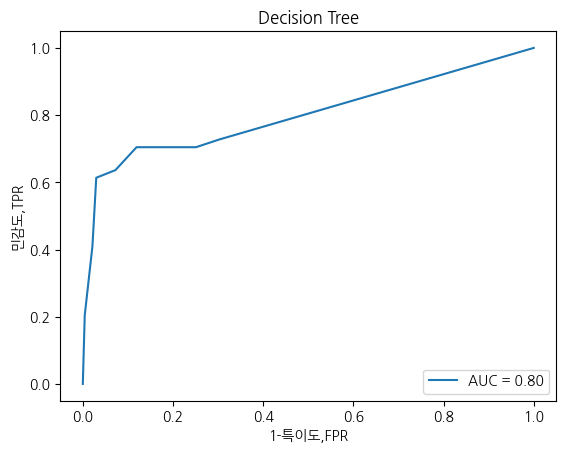

In [59]:
plt.title("Decision Tree")
plt.plot(fpr_decision, tpr_decision, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [60]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.6923076923076923]

In [61]:
rf_final = RandomForestClassifier(min_samples_leaf=15, max_depth=6, n_estimators=100, random_state=1234)
rf_final.fit(df_train_x_rd, df_train_y)

train_accuracy.append(rf_final.score(df_train_x_rd, df_train_y))
test_accuracy.append(rf_final.score(df_test_x_rd, df_test_y))

y_prob_1 = rf_final.predict_proba(df_test_x_rd)[:, 1]
y_pred = rf_final.predict(df_test_x_rd)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))


fpr_random, tpr_random, thresholds_random = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr_random, tpr_random)


model_auc.append(roc_auc)

Confusion matrix: 
[[231   4]
 [ 33  11]]
              precision    recall  f1-score   support

           0      0.875     0.983     0.926       235
           1      0.733     0.250     0.373        44

    accuracy                          0.867       279
   macro avg      0.804     0.616     0.649       279
weighted avg      0.853     0.867     0.839       279



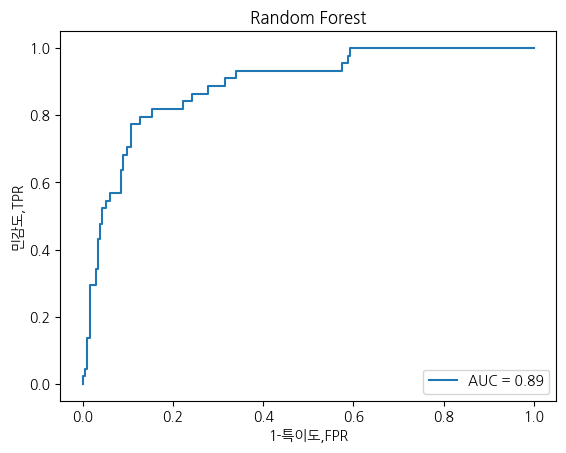

In [62]:
plt.title("Random Forest")
plt.plot(fpr_random, tpr_random, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [63]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.6923076923076923, 0.3728813559322034]

In [64]:
gb_final = GradientBoostingClassifier(min_samples_leaf=40, min_samples_split=30, max_depth=3, n_estimators=30,
			 learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x_rd, df_train_y)

train_accuracy.append(gb_final.score(df_train_x_rd, df_train_y))
test_accuracy.append(gb_final.score(df_test_x_rd, df_test_y))

y_prob_1 = gb_final.predict_proba(df_test_x_rd)[:, 1]
y_pred = gb_final.predict(df_test_x_rd)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

fpr_gradient, tpr_gradient, thresholds_gradient = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr_gradient, tpr_gradient)


model_auc.append(roc_auc)

Confusion matrix: 
[[228   7]
 [ 22  22]] 

              precision    recall  f1-score   support

           0      0.912     0.970     0.940       235
           1      0.759     0.500     0.603        44

    accuracy                          0.896       279
   macro avg      0.835     0.735     0.771       279
weighted avg      0.888     0.896     0.887       279



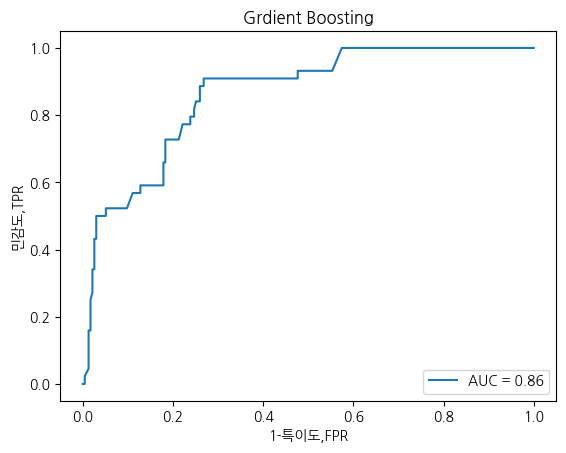

In [65]:
plt.title("Grdient Boosting")
plt.plot(fpr_gradient, tpr_gradient, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [66]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.6923076923076923, 0.3728813559322034, 0.6027397260273972]

In [67]:
nn_final = MLPClassifier(hidden_layer_sizes=(35, 35), batch_size=180, activation="relu", solver="adam", random_state = 1234)
nn_final.fit(df_train_x_sd, df_train_y)

train_accuracy.append(nn_final.score(df_train_x_sd, df_train_y))
test_accuracy.append(nn_final.score(df_test_x_sd, df_test_y))

y_prob_1 = nn_final.predict_proba(df_test_x_sd)[:, 1]  # 1 발생 확률
y_pred = nn_final.predict(df_test_x_sd)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr_mlp, tpr_mlp)


model_auc.append(roc_auc)

Confusion matrix: 
[[219  16]
 [ 13  31]] 

              precision    recall  f1-score   support

           0      0.944     0.932     0.938       235
           1      0.660     0.705     0.681        44

    accuracy                          0.896       279
   macro avg      0.802     0.818     0.810       279
weighted avg      0.899     0.896     0.897       279



/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


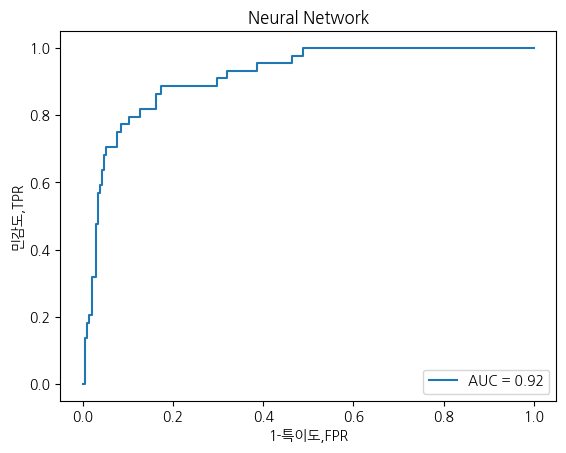

In [68]:
plt.title("Neural Network")
plt.plot(fpr_mlp, tpr_mlp, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [69]:

model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.6923076923076923,
 0.3728813559322034,
 0.6027397260273972,
 0.6813186813186813]

In [70]:

df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score

df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.885,0.914,0.800,0.794,0.614,0.692
RandomForest,0.849,0.867,0.888,0.733,0.250,0.373
GradientBoosting,0.899,0.896,0.863,0.759,0.500,0.603
NeuralNet,1.000,0.896,0.916,0.660,0.705,0.681


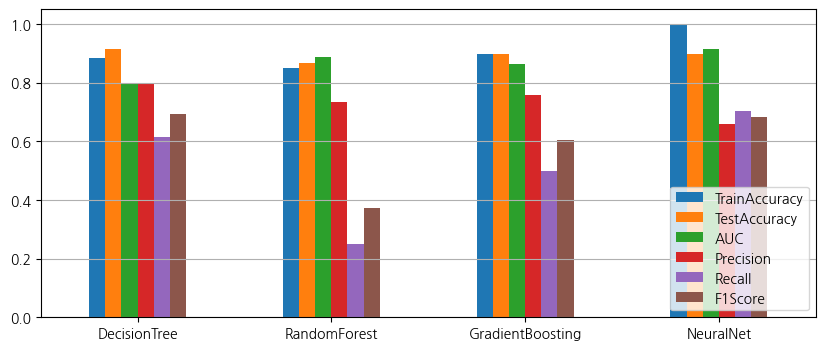

In [52]:

df_eval.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="lower right")
plt.grid(axis = "y")

### 종합 결론
4가지 모델 전체의 성과 지표들을 비교 분석할 수 있도록 그림으로 나타냈다. <br>
전체적으로 모델의 성능이 좋았던 건 Neural Network와 Decision Tree였다. <br>
모든 지표 마다 가장 좋았던 모델을 추려내면 이 두가지 모델 내에 있었다. <br>
Decision Tree는 다른 모델들에 비해 가장 TestAccuracy가 좋았으며 이외에도 Precision, F1-Score에서 가장 높은 수치를 보였다.<br>
특히나 F1-score가 높았던 게 precision과 recall 모두 골고루 우수했으므로 나타난 성과임을 알 수 있다. <br>
다음으로 Neural Network는 Train Accuracy, AUC, Recall에서 가장 높은 수치가 도출됐다. 그중 Train Accuracy가 높은 이유로 모델을 반복학습을 너무 오래 시켜서 나타난 과적합 현상으로 파악할 수 있다.<br>
이는 Max_iteration이 200으로 고정됨에 따라 학습이 과하게 오랫동안 지속돼서 나타난 현상으로 생각된다.<br>
두가지 모델을 비롯하여 전체 모델 중 전반적으로 쓰이기 쉬운 모델은 Decision Tree라고 생각되며 Recall을 좀 더 개선할 수 있도록 파라미터 조정, 데이터 정제 등을 한다면 충분히 사용가능할 것으로 생각된다.